In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data

In [3]:
# Generate synthetic data
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42)


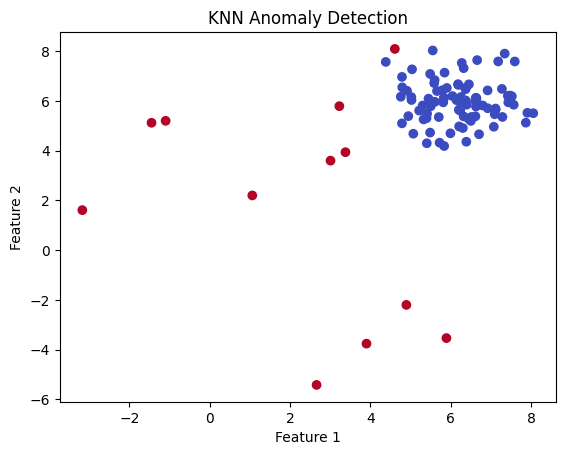

In [4]:
# Train KNN detector
clf = KNN()
clf.fit(X_train)

# Get the prediction labels and outlier scores for the test data
y_test_pred = clf.predict(X_test)  # binary labels (0: inliers, 1: outliers)
y_test_scores = clf.decision_function(X_test)  # raw outlier scores

# Plot the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm')
plt.title('KNN Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Training: 100%|██████████| 100/100 [00:00<00:00, 138.50it/s]


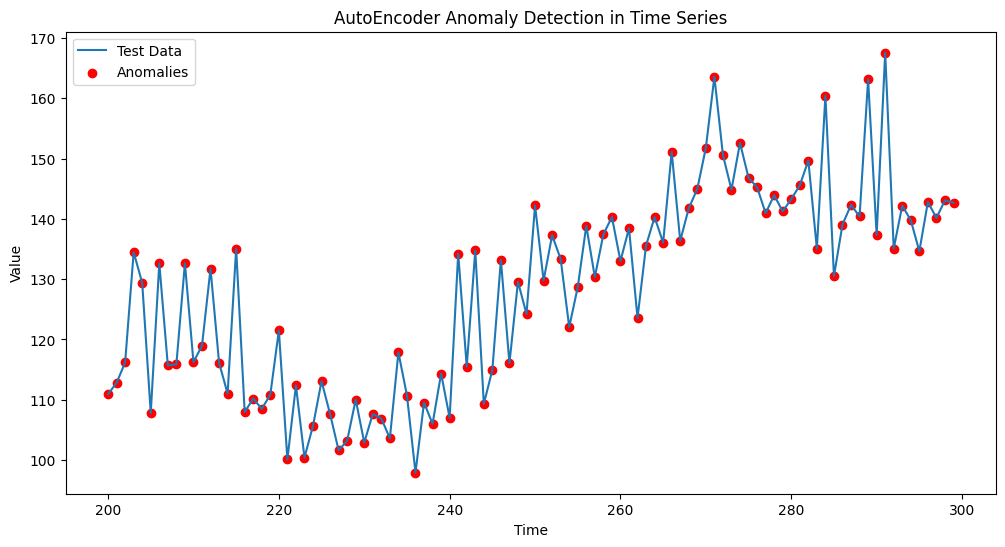

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

# Generate synthetic time series data
np.random.seed(42)
time_series_length = 300
contamination = 0.1  # percentage of outliers

# Create a time series with a trend and some noise
time = np.arange(time_series_length)
series = 0.5 * time + 10 * np.sin(0.1 * time) + np.random.normal(0, 5, time_series_length)

# Introduce anomalies
n_anomalies = int(contamination * time_series_length)
anomaly_indices = np.random.choice(time_series_length, n_anomalies, replace=False)
series[anomaly_indices] += np.random.normal(20, 5, n_anomalies)

# Reshape the data for the AutoEncoder
X = series.reshape(-1, 1)

# Split the data into training and testing sets
n_train = 200
X_train, X_test = X[:n_train], X[n_train:]

# Train the AutoEncoder detector
clf = AutoEncoder(hidden_neuron_list=[64,32,64], epoch_num=100, contamination=contamination)

clf.fit(X_train)

# Get the prediction labels and outlier scores for the test data
y_test_pred = clf.predict(X_test)  # binary labels (0: inliers, 1: outliers)
y_test_scores = clf.decision_function(X_test)  # raw outlier scores

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time[n_train:], X_test, label='Test Data')
plt.scatter(time[n_train:][y_test_pred == 1], X_test[y_test_pred == 1], color='red', label='Anomalies')
plt.title('AutoEncoder Anomaly Detection in Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Training:   0%|          | 0/200 [00:00<?, ?it/s]

Training: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


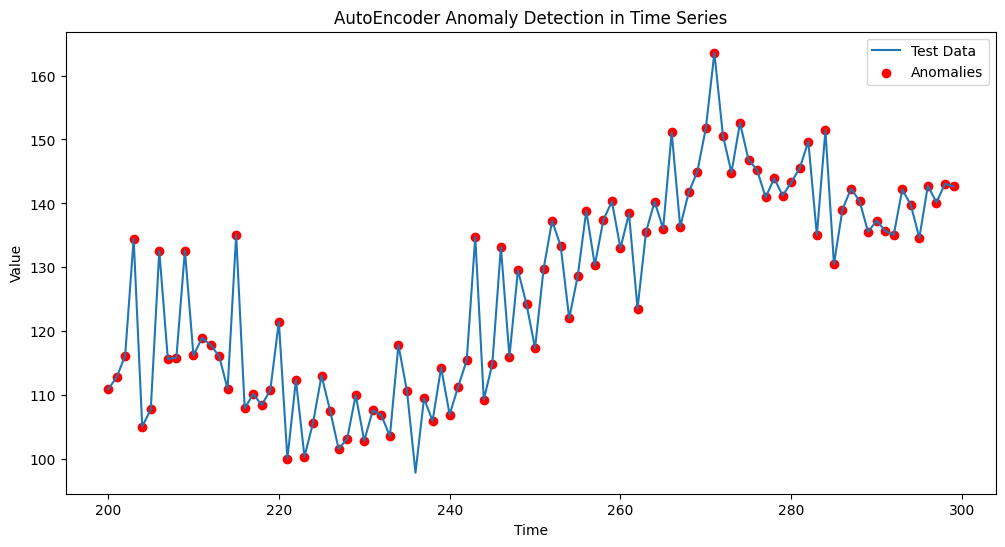

In [20]:
# Generate synthetic time series data
np.random.seed(42)
time_series_length = 300
contamination = 0.05  # Lower percentage of outliers

# Create a time series with a trend and some noise
time = np.arange(time_series_length)
series = 0.5 * time + 10 * np.sin(0.1 * time) + np.random.normal(0, 5, time_series_length)

# Introduce anomalies
n_anomalies = int(contamination * time_series_length)
anomaly_indices = np.random.choice(time_series_length, n_anomalies, replace=False)
series[anomaly_indices] += np.random.normal(20, 5, n_anomalies)

# Reshape the data for the AutoEncoder
X = series.reshape(-1, 1)

# Split the data into training and testing sets
n_train = 200
X_train, X_test = X[:n_train], X[n_train:]

# Train the AutoEncoder detector
clf = AutoEncoder(hidden_neuron_list=[128,64,32,64,34,16,8],
                 epoch_num=200, 
                 contamination=contamination,
                 batch_size=16,
                 dropout_rate=0.5,
                 device="mps")
clf.fit(X_train)

# Get the prediction labels and outlier scores for the test data
y_test_pred = clf.predict(X_test)  # binary labels (0: inliers, 1: outliers)
y_test_scores = clf.decision_function(X_test)  # raw outlier scores

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time[n_train:], X_test, label='Test Data')
plt.scatter(time[n_train:][y_test_pred == 1], X_test[y_test_pred == 1], color='red', label='Anomalies')
plt.title('AutoEncoder Anomaly Detection in Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_neuron_list': [[64, 32], [128, 64, 32], [128, 64, 32, 64, 34, 16, 8]],
    'epochs': [50, 100, 200],
    'batch_size': [16, 32],
    'dropout_rate': [0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=AutoEncoder(contamination=0.05), param_grid=param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


ValueError: Invalid parameter epochs for estimator AutoEncoder(batch_norm=True, batch_size=16, compile_mode='default',
      contamination=0.05, device=device(type='cpu'), dropout_rate=0.1,
      epoch_num=10, hidden_activation_name='relu',
      hidden_neuron_list=[64, 32], lr=0.001, optimizer_name='adam',
      optimizer_params={'weight_decay': 1e-05}, preprocessing=True,
      random_state=42, use_compile=False, verbose=1). Check the list of available parameters with `estimator.get_params().keys()`.

/var/folders/wr/rq4bfhkj6h56q645ftw89wtm0000gn/T/ipykernel_74185/1136242628.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.DataFrame({'timestamp': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),
Training: 100%|██████████| 100/100 [00:05<00:00, 18.80it/s]


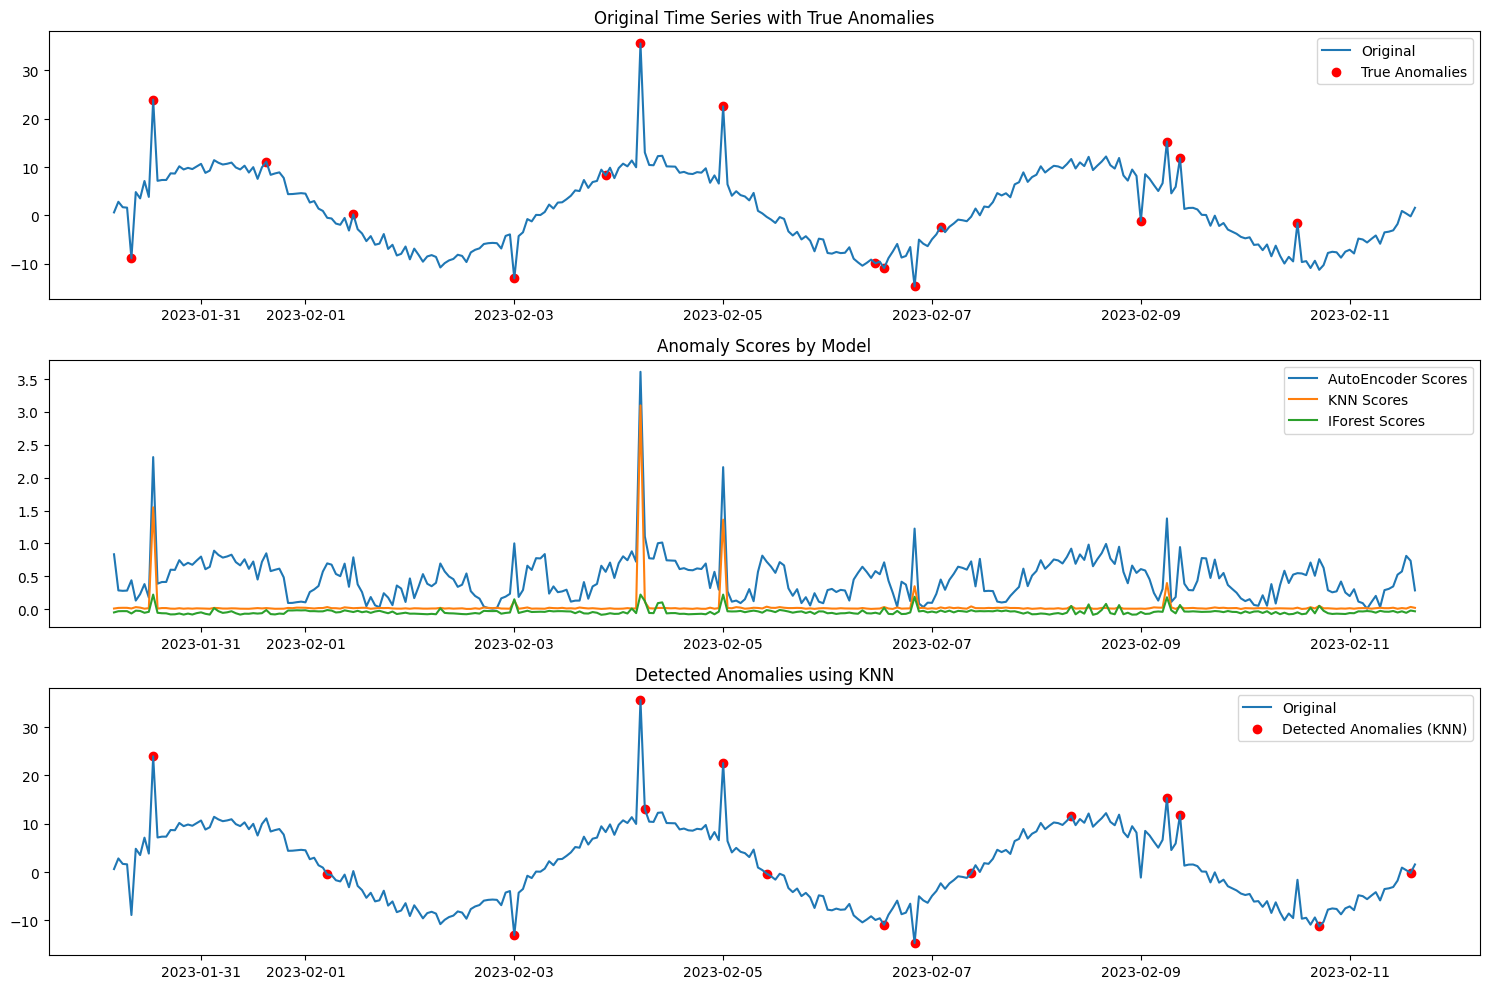

Performance Metrics:
AutoEncoder: Precision = 0.55, Recall = 0.38, F1 = 0.44
KNN: Precision = 0.54, Recall = 0.44, F1 = 0.48
IForest: Precision = 0.40, Recall = 0.50, F1 = 0.44


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from sklearn.metrics import precision_recall_fscore_support

# Generate a more complex synthetic time series
def generate_complex_timeseries(n_samples=1000, contamination=0.05):
    np.random.seed(42)
    t = np.linspace(0, 10, n_samples)
    trend = 0.1 * t
    seasonality = 10 * np.sin(2 * np.pi * t)
    noise = np.random.normal(0, 1, n_samples)
    series = trend + seasonality + noise
    
    # Add anomalies
    n_anomalies = int(contamination * n_samples)
    anomaly_indices = np.random.choice(n_samples, n_anomalies, replace=False)
    series[anomaly_indices] += np.random.normal(0, 10, n_anomalies)
    
    true_labels = np.zeros(n_samples)
    true_labels[anomaly_indices] = 1
    
    return pd.DataFrame({'timestamp': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),
                         'value': series}), true_labels

# Generate data
data, true_labels = generate_complex_timeseries(n_samples=1000, contamination=0.05)

# Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(data['value'].values.reshape(-1, 1))

# Split data
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_true = true_labels[train_size:]

# Define and train multiple anomaly detection models
models = {
    'AutoEncoder': AutoEncoder(hidden_neuron_list=[64 ,32, 16, 8,16, 32, 64], contamination=0.02, epoch_num=100),
    'KNN': KNN(contamination=0.05, n_jobs=-1),
    'IForest': IForest(contamination=0.05, random_state=42, n_jobs=-1)
}

results = {}
for name, model in models.items():
    model.fit(X_train)
    y_pred = model.predict(X_test)
    scores = model.decision_function(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    results[name] = {'precision': precision, 'recall': recall, 'f1': f1, 'scores': scores}

# Visualize results
plt.figure(figsize=(15, 10))

# Plot original series with true anomalies
plt.subplot(3, 1, 1)
plt.plot(data['timestamp'][train_size:], data['value'][train_size:], label='Original')
plt.scatter(data['timestamp'][train_size:][y_true == 1], data['value'][train_size:][y_true == 1], 
            color='red', label='True Anomalies')
plt.title('Original Time Series with True Anomalies')
plt.legend()

# Plot anomaly scores for each model
plt.subplot(3, 1, 2)
for name, result in results.items():
    plt.plot(data['timestamp'][train_size:], result['scores'], label=f'{name} Scores')
plt.title('Anomaly Scores by Model')
plt.legend()

# Plot detected anomalies for the best performing model
best_model = max(results, key=lambda x: results[x]['f1'])
plt.subplot(3, 1, 3)
plt.plot(data['timestamp'][train_size:], data['value'][train_size:], label='Original')
plt.scatter(data['timestamp'][train_size:][results[best_model]['scores'] > np.percentile(results[best_model]['scores'], 95)], 
            data['value'][train_size:][results[best_model]['scores'] > np.percentile(results[best_model]['scores'], 95)], 
            color='red', label=f'Detected Anomalies ({best_model})')
plt.title(f'Detected Anomalies using {best_model}')
plt.legend()

plt.tight_layout()
plt.show()

# Print performance metrics
print("Performance Metrics:")
for name, result in results.items():
    print(f"{name}: Precision = {result['precision']:.2f}, Recall = {result['recall']:.2f}, F1 = {result['f1']:.2f}")